# Pretty Plotting (literally)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import hotstepper as hs
from hotstepper import Bases, Basis, Step, Steps
import hotstepper.samples as samples


## Pretty Plot

Somtimes, we just want a pretty plot, inparticular, with step data, the formal plotting method should indicate the nature of the step end points, for example, filled markers indicate set membership, open markers we are plotting right up to, but technically not including that last point.

<AxesSubplot:>

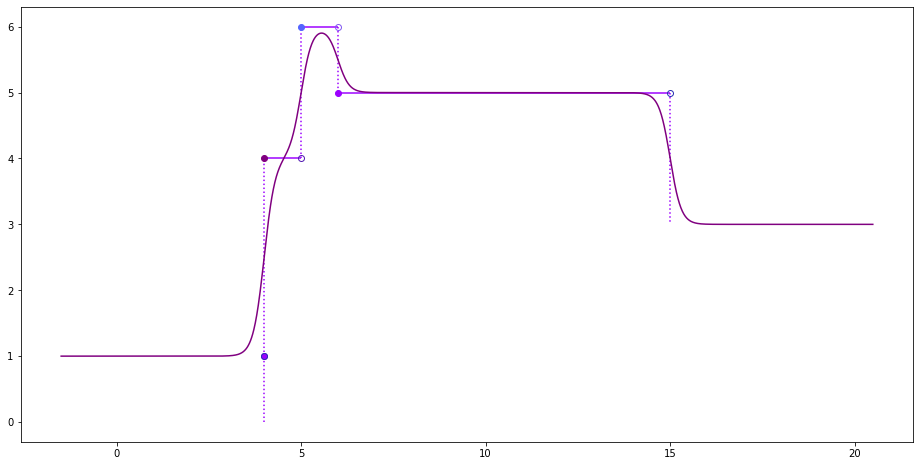

In [2]:
st1 = Step(5,15,2)
st2 = Step(end=6)
st3 = Step(4,weight=3)


sts = Steps().add([st1,st2,st3])
ax = sts.plot(method='pretty')
sts.plot(ax=ax,method='smooth',smooth_factor=0.3)


## Steps are funny

One of the things makes step functions different to regular functions is that they can be evaluated differently depending on the rule used to determine their membership to the range set. That all sounds fancy and stuff, but what it really means is where do we decide to make the step value change, before the step key, on the step key or after.

For those needing something abit more mathematically concrete, please see the full explanation of step functions and their properties in the [HotStepper Documentation](https://hotstepper.readthedocs.io/step_functions.html).

The short answer is, the step function will look different depending on the rule we use to evaluate where step changes occur. 
HotStepper by default uses the where='post' evaluation location, as this conforms with the signal processing definition used for the [Heaviside Step Function](https://en.wikipedia.org/wiki/Heaviside_step_function) which is the default basis.

An easy way to see the differences and how they look, we can pass different where= parameter values to the plot method. We use the pretty plot method for the default (where='post') to clearly see the step change locations, changing the where parameter to either 'pre' or 'mid', we see how the changes occur relative to this fixed locations.


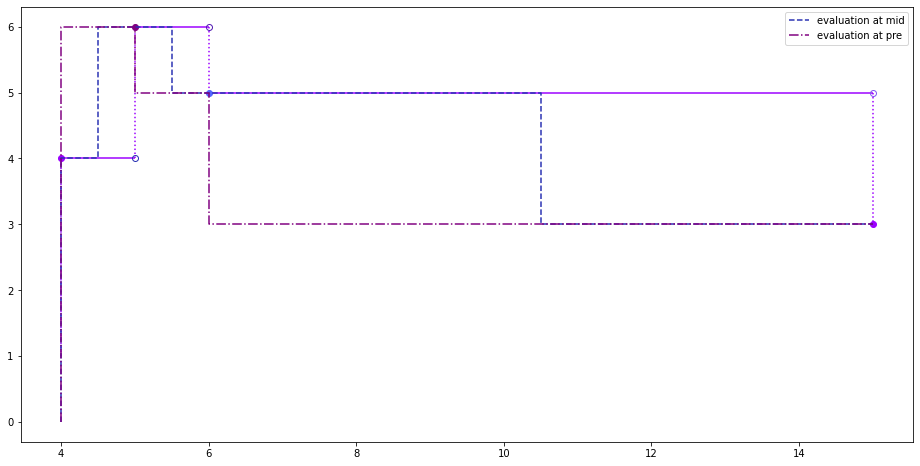

In [3]:
ax = sts.plot(method='pretty')
sts.plot(ax=ax,where='mid',linestyle='--',label='evaluation at mid')
sts.plot(ax=ax,where='pre',linestyle='-.',label='evaluation at pre')
ax.legend();


## Smooth Plotting Multiple Basis (kernel)

Changing the basis to use for smooth plotting is pretty simple, just pick your nwe Base from the pre-baked selection, wrap it in a Basis, which allows you to specify a smoothing parameter to be used with that basis and give it to the plot method.

A few items to point out here, as you can take your next **steps** in multiple ways with HotStepper.
 - Can smooth plot by calling smooth_plot() on the steps
 - Can smooth plot by using method='smooth' in the call to plot() on the steps

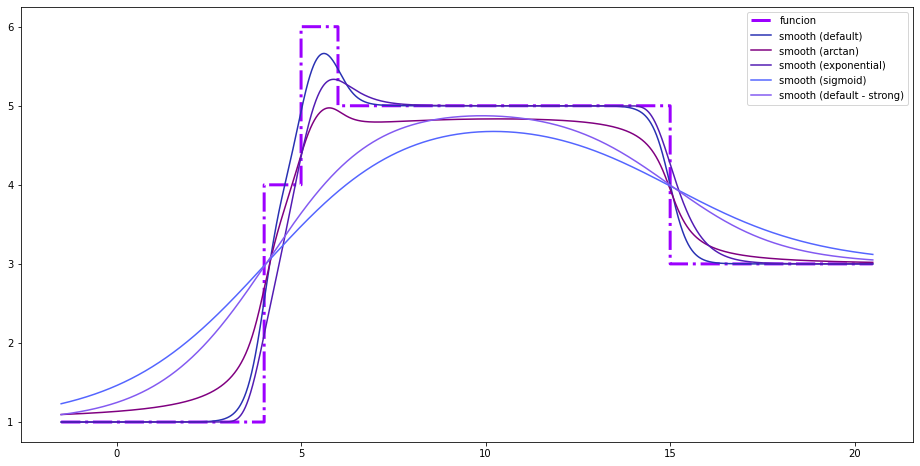

In [4]:
ax = sts.plot(method='function',label='funcion',linewidth=3,linestyle='-.')
sts.plot(ax=ax,method='smooth',label='smooth (default)',smooth_factor=0.5)
sts.plot(ax=ax,method='smooth', smooth_basis=Basis(Bases.arctan,0.5),label='smooth (arctan)')
sts.plot(ax=ax,method='smooth', smooth_basis=Basis(Bases.exponential,0.5),label='smooth (exponential)')
sts.plot(ax=ax,method='smooth', smooth_basis=Basis(Bases.sigmoid),smooth_factor=2,label='smooth (sigmoid)')
sts.plot(ax=ax,method='smooth',smooth_factor=3,label='smooth (default - strong)')

ax.legend();

Hostepper has a couple of basis functions that don't do smoothing in the same way the other bases do. The short answer is that these basis functions don't have a limit representation of the Heaviside function, unlike the other bases. For a full explanation of what this means, please see the [Basis and Bases](https://hotstepper.readthedocs.io/basis.html) documentation. So the normal and sinc basis represent a class of basis functions ([kernel functions](https://en.wikipedia.org/wiki/Kernel_smoother)) that are centered around zero and provide a means to smooth the step **changes** instead of the step function **values**. This can be very helpful when analysing the nature of the transitions that occur within the steps data.

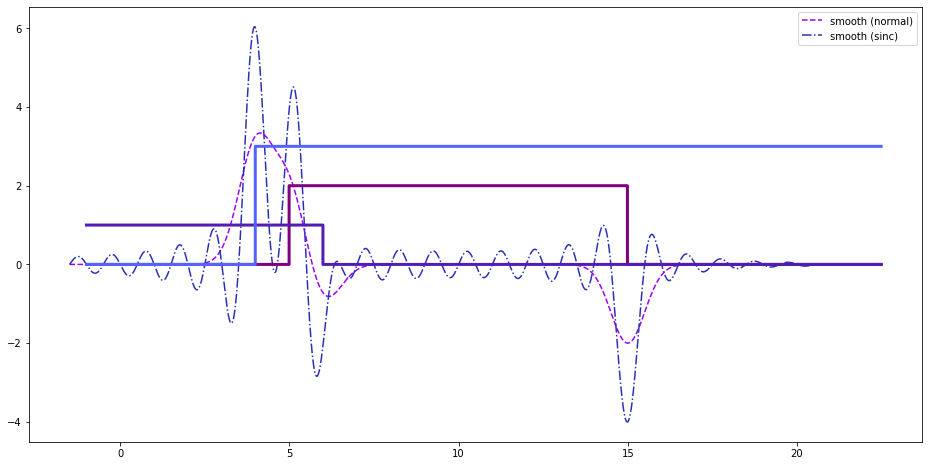

In [5]:
ax = sts.plot(method='smooth', smooth_basis=Basis(Bases.normal),smooth_factor=0.5,label='smooth (normal)',linestyle='--')
sts.plot(ax=ax,method='smooth', smooth_basis=Basis(Bases.sinc),smooth_factor=0.5,label='smooth (sinc)',linestyle='-.')

x = np.arange(-1,sts.last()*1.5,0.01)

for s in [st1,st2,st3]:
    ax.step(x,s(x),linewidth=3)

ax.legend();

If you create a new Basis and specify a smoothing parameter for that Basis, then you specify a smooth_factor in the call to smooth plot or plot with method='smooth', the parameter in the Basis object will be overridden by the provided smooth_factor.

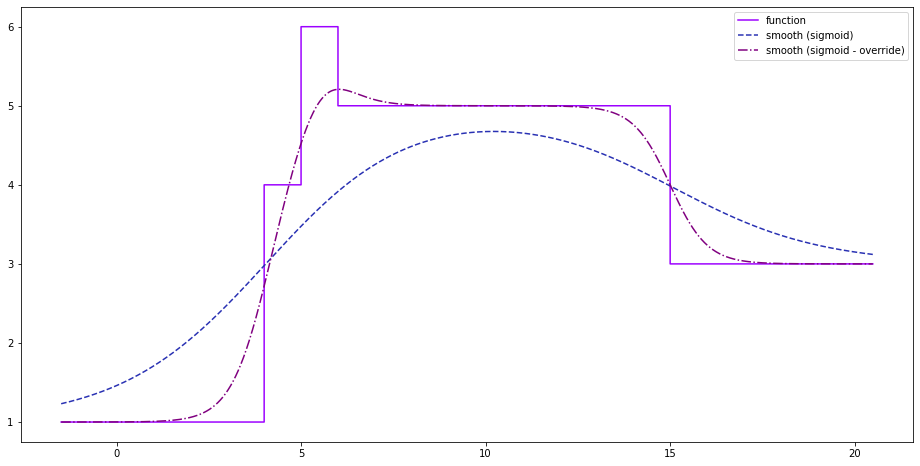

In [6]:
ax = sts.plot(label='function',method='function')
sts.plot(ax=ax,method='smooth', smooth_basis=Basis(Bases.sigmoid,2),label='smooth (sigmoid)',linestyle='--')
sts.plot(ax=ax,method='smooth', smooth_basis=Basis(Bases.sigmoid,2),smooth_factor=0.5,label='smooth (sigmoid - override)',linestyle='-.')

ax.legend();